* [Scotland's Aquaculture Map](http://aquaculture.scotland.gov.uk/map/map.aspx)
* [Shellfish results](http://www.foodstandards.gov.scot/business-and-industry/industry-specific-advice/fish-and-shellfish/shellfish-results)
* [Safety and harvesting](http://www.foodstandards.gov.scot/business-and-industry/industry-specific-advice/fish-and-shellfish)

https://twitter.com/FSScotBiotoxins

http://www.foodstandards.gov.scot/business-and-industry/industry-specific-advice/fish-and-shellfish

http://aquaculture.scotland.gov.uk/data/site_details.aspx

http://aquaculture.scotland.gov.uk/data/shellfish_species_area_classification.aspx

http://aquaculture.scotland.gov.uk/data/phytoplankton_monitoring_samples.aspx

In [15]:
import matplotlib

In [16]:
help(matplotlib)

Help on package matplotlib:

NAME
    matplotlib - This is an object-oriented plotting library.

DESCRIPTION
    A procedural interface is provided by the companion pyplot module,
    which may be imported directly, e.g.::
    
        import matplotlib.pyplot as plt
    
    or using ipython::
    
        ipython
    
    at your terminal, followed by::
    
        In [1]: %matplotlib
        In [2]: import matplotlib.pyplot as plt
    
    at the ipython shell prompt.
    
    For the most part, direct use of the object-oriented library is
    encouraged when programming; pyplot is primarily for working
    interactively.  The
    exceptions are the pyplot commands :func:`~matplotlib.pyplot.figure`,
    :func:`~matplotlib.pyplot.subplot`,
    :func:`~matplotlib.pyplot.subplots`, and
    :func:`~pyplot.savefig`, which can greatly simplify scripting.
    
    Modules include:
    
        :mod:`matplotlib.axes`
            defines the :class:`~matplotlib.axes.Axes` class.  Most pylab

# Setup

In [17]:
%matplotlib inline

import os
import datetime
import requests
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Local location where the files original data files were downloaded. 
data_dir_path = os.path.join(os.path.expanduser('~'), 'Downloads')

# Used to create format string
# And, find a list of files
phytoplankton_start_str = 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report'
biotoxin_start_str = 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report'
e_coli_start_str = 'Shellfish_-_E._coli_-_Weekly_Result_Report'

# Format string used for creating filenames for downloading.
format_str_phytoplankton = phytoplankton_start_str + '_-_{}_-_{}_{}.xlsx'
format_str_e_coli = e_coli_start_str + '_-_{}_-_{}_{}_.xls'
format_str_biotoxin = biotoxin_start_str + '_-_{}_-_{}_{}.xls'

def get_downloaded_shellfish_filenames():

    def list_of_files_starting_with(startswith, filesnames):
        return [f for f in filesnames if f.startswith(startswith)]
    
    filesnames_all = os.listdir(data_dir_path)
    filesnames_shellfish = list_of_files_starting_with('Shellfish', filesnames_all)
    
    filenames_shellfish_phytoplankton = list_of_files_starting_with(phytoplankton_start_str, filesnames_shellfish)    
    filenames_shellfish_e_coli = list_of_files_starting_with(e_coli_start_str, filesnames_shellfish)
    filenames_shellfish_biotoxin = list_of_files_starting_with(biotoxin_start_str, filesnames_shellfish)
    
    return filenames_shellfish_phytoplankton, filenames_shellfish_e_coli, filenames_shellfish_biotoxin
    
(filenames_shellfish_phytoplankton
 , filenames_shellfish_e_coli
 , filenames_shellfish_biotoxin) = get_downloaded_shellfish_filenames()


In [2]:
assert filenames_shellfish_e_coli == [
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_April_27_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_January_19_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_July_06_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_March_16_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_April_06_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_March_02_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_June_15_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_February_16_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_August_03_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_June_29_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_August_10_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_May_25_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_August_17_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_March_23_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_January_12_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_January_26_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_April_13_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_May_11_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_April_20_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_February_23_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_July_13_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_May_18_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_June_01_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_March_09_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_July_27_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_June_22_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_July_20_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_June_08_.xls',
 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_March_30_.xls']

assert filenames_shellfish_phytoplankton == [
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_March_30.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_May_18.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_July_20.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_June_22.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_January_12.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_May_25.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_January_19.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_March_16.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_March_02.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_January_26.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_April_27.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_April_06.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_August_10.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_June_01.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_July_13.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_April_13.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_March_09.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_February_16.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_April_20.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_May_11.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_June_29.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_February_23.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_August_03.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_March_23.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_August_17.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_June_08.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_July_27.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_July_06.xlsx',
 'Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_2018_-_June_15.xlsx']

assert filenames_shellfish_biotoxin == [
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_January_12.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_February_16.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_July_13.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_March_09.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_June_08.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_January_19.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_August_17.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_May_18.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_July_27.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_June_22.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_April_13.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_March_16.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_January_26.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_April_27.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_May_11.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_June_29.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_June_01.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_May_25.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_February_23.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_March_23.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_March_30.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_August_10.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_March_02.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_April_06.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_July_20.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_April_20.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_June_15.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_July_06.xls',
 'Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_2018_-_August_03.xls']

# Some contents

[#Local-files](#Local-files)

# Download files

http://www.foodstandards.gov.scot/publications-and-research/publications/shellfish-results-week-ending-03-august-2018



http://docs.python-requests.org/en/master/

In [20]:
def create_list_of_filenames(format_string):
    
    my_months = ['January'
             , 'February'
             ,'March'
             , 'April'
             , 'May'
             , 'June'
             , 'July'
             , 'August'
             , 'September'
             , 'October'
             , 'November'
             , 'December'
            ]

    list_of_filenames = []
    
    t = datetime.datetime(year=2018, month=1, day=1)
    for i in range(365):

        day = t.strftime('%d')
        month = my_months[t.month-1]
        year = t.year
        list_of_filenames.append(format_string.format(year, month, day))
        t = t + datetime.timedelta(days=1)
    return list_of_filenames

if False: 
    #list_of_filenames_phytoplankton = create_list_of_filenames('Shellfish_-_Phytoplankton_-_4_Weekly_Result_Report_-_{}_-_{}_{}.xlsx')
    list_of_filenames_phytoplankton = create_list_of_filenames(format_str_phytoplankton)

    #list_of_filenames_e_coli = create_list_of_filenames('Shellfish_-_E._coli_-_Weekly_Result_Report_-_{}_-_{}_{}_.xls')
    list_of_filenames_e_coli = create_list_of_filenames(format_str_e_coli)

    #list_of_filenames_biotoxin = create_list_of_filenames('Shellfish_-_Biotoxin_-_4_Weekly_Result_Report_-_{}_-_{}_{}.xls')
    list_of_filenames_biotoxin = create_list_of_filenames(format_str_biotoxin)

In [ ]:
def url(filename):
    return 'http://www.foodstandards.gov.scot/downloads/' + filename

def filepath(filename):
    return os.path.join(data_dir_path, filename)
    
def filter_out_exiting_filesnames(list_of_filenames):
    new_filenames = []
    for filename in list_of_filenames:
        if os.path.exists(path):
            continue
        new_filenames.append(filename)
        
if False:
    list_of_filenames_phytoplankton = filter_out_exiting_filesnames(list_of_filenames_phytoplankton)
    list_of_filenames_e_coli = filter_out_exiting_filesnames(list_of_filenames_e_coli)
    list_of_filenames_biotoxin = filter_out_exiting_filesnames(list_of_filenames_biotoxin)

In [33]:
list_of_data_files = pd.DataFrame(os.listdir(data_dir_path), columns=['files'])

In [97]:
list_of_data_files_phytoplankton = list_of_data_files[list_of_data_files.files.str.startswith(phytoplankton_start_str)].copy()
list_of_data_files_e_coli = list_of_data_files[list_of_data_files.files.str.startswith(e_coli_start_str)].copy()
list_of_data_files_biotoxin = list_of_data_files[list_of_data_files.files.str.startswith(biotoxin_start_str)].copy()

In [132]:
def year(x):
    return int(x.split('.')[0].split('_')[-4])
def month(x):
    my_months_to_int = dict(zip(my_months, range(1,13)))
    return my_months_to_int[x.split('.')[0].split('_')[-2]]
def day(x):
    return int(x.split('.')[0].split('_')[-1])

def to_date(x):
    return datetime.date(year=year(x), month=month(x), day=day(x))

list_of_data_files_phytoplankton['date'] = list_of_data_files_phytoplankton['files'].apply(to_date)
list_of_data_files_biotoxin['date'] = list_of_data_files_biotoxin['files'].apply(to_date)

In [133]:
def year(x):
    return int(x.split('_')[-5])
def month(x):
    my_months_to_int = dict(zip(my_months, range(1,13)))
    return my_months_to_int[x.split('_')[-3]]
def day(x):
    return int(x.split('_')[-2])
def to_date(x):
    return datetime.date(year=year(x), month=month(x), day=day(x))

list_of_data_files_e_coli['date'] = list_of_data_files_e_coli['files'].apply(to_date)

In [23]:
def download_save_from_list(list_of_filenames):
    
    def download_save(url, path):
        
        r = requests.get(url, stream=True)

        if r.status_code == 200:
            with open(path, 'wb') as f:
                f.write(r.content)
        
    for filename in list_of_filenames:
        
        #url = 'http://www.foodstandards.gov.scot/downloads/' + filename
        url =  url(filename)
        path = filepath(filename)
        #if os.path.exists(path):
        #    continue

        download_save(url, path)

                print('.', end='')
if False:
    download_save_from_list(list_of_filenames_phytoplankton)
    download_save_from_list(list_of_filenames_e_coli)
    download_save_from_list(list_of_filenames_biotoxin)


KeyboardInterrupt: 

# Local files

## Campbeltown Loch - Shellfish Phytoplankton

[#Setup](#Setup)

In [7]:
header = ['Region'
     , 'Area'
     , 'Site'
     , 'Origin of Sample'
     , 'NGR'
     , 'SIN'
     , 'Sample'
     , 'Collected'
     , 'Received'
     , 'Analyzed'
     , 'Pseudo-nitzschia'
     , 'Alexandrium'
     , 'Dinophysis'
     , 'prorocentrum_lima'
     , 'prorocentrum_cordatum'
     , 'Lingulodinium'
     , 'Protoceratium']

header_pyhtoplanktons = header[10:]
header_pyhtoplanktons_trig = header[10:-3]
header_pyhtoplanktons_no_trig = header[-3:]

triggers = [50000, 40, 100, 100]

def read_pyhtoplankton(data_dir_path):
    
    pyhtoplankton_list = []
    for f in filenames_shellfish_phytoplankton:

        phytoplankton_period = pd.read_excel(
            os.path.join(data_dir_path, f), skiprows=[0, 1, 2, 3], header=None)
        
        pyhtoplankton_list.append(phytoplankton_period)
        
    return pd.concat(pyhtoplankton_list)

def preprocess_pyhtoplankton(pyhtoplankton):
    
    pyhtoplankton.columns = header
    pyhtoplankton['Region'] = pyhtoplankton.Region.fillna(method='ffill')
    pyhtoplankton['Collected'] = pd.to_datetime(pyhtoplankton['Collected'])
    
    return pyhtoplankton

def select_area(area, pyhtoplankton):

    pyhtoplankton_area = pyhtoplankton[pyhtoplankton['Area']==area]
    pyhtoplankton_area = pyhtoplankton_area.set_index('Collected')
    
    return pyhtoplankton_area

pyhtoplankton = read_pyhtoplankton(data_dir_path=data_dir_path)
pyhtoplankton = preprocess_pyhtoplankton(pyhtoplankton)


pyhtoplankton_ct = select_area('Campbeltown Loch', pyhtoplankton)

In [8]:
pyhtoplankton.columns

Index(['Region', 'Area', 'Site', 'Origin of Sample', 'NGR', 'SIN', 'Sample',
       'Collected', 'Received', 'Analyzed', 'Pseudo-nitzschia', 'Alexandrium',
       'Dinophysis', 'prorocentrum_lima', 'prorocentrum_cordatum',
       'Lingulodinium', 'Protoceratium'],
      dtype='object')

In [9]:
pyhtoplankton.SIN.unique()

array(['AB 029 008 04', 'AB 041 1199 13', 'AB 130 022 13',
       'AB 147 036 13', 'AB 151 039 13', 'AB 205 063 08', 'AB 286 082 13',
       'AB 617 1204 08', 'AB 695 1507 08', 'DG 191 175 12',
       'DG 499 865 16', 'FF 072 188 16', 'HL 114 937 08', 'HL 136 219 08',
       'LH 168 114 08', 'LH 185 120 08', 'LH 187 699 08', 'LH 203 127 08',
       'LH 249 129 04', 'RC 090 1616 08', 'RC 625 1233 13',
       'SA 337 719 16', 'SI 037 415 08', 'SI 050 420 08', 'SI 080 424 08',
       'SI 232 438 08', 'SI 242 443 08', 'SI 288 455 08', 'SI 297 469 08',
       'SI 321 462 08', 'SI 324 399 08', 'SI 326 733 08', 'SI 327 410 08',
       'SI 797 2083 08', 'SL 137 281 08', 'SL 159 286 13',
       'UB 282 165 04', 'AB 200 1915 08', 'HS 103 303 13',
       'HS 157 310 08', 'HS 167 320 08', 'AB 200 059 08', 'LH 057 106 08',
       'AB 178 051 08', 'AB 202 059 08'], dtype=object)

In [ ]:
plt.savefig()

In [24]:
if False:
    def plot_pyhtoplankton(pyhtoplankton):
        ax = pyhtoplankton.plot.barh(y=header_pyhtoplanktons
                                    , figsize=(10, 50)
                                    , grid=True
                                     , logx=True
                                    , label=False
                                    , width=2)
        ax.legend(loc=0, fontsize=14)
        ax.set_title(label="Phytoplankton", fontsize=20)

        plt.savefig('phytoplankton.png')
        plt.close()
    
    plot_pyhtoplankton(pyhtoplankton_ct)
    

In [26]:
if False:
    def plot_pyhtoplankton_no_trig(pyhtoplankton, header_pyhtoplanktons_no_trig):
        pyhtoplankton_no_trig = pyhtoplankton[header_pyhtoplanktons_no_trig]

        ax = pyhtoplankton_no_trig.plot.barh(figsize=(10, 40)
                                             , grid=True
                                             , logx=True
                                             , ylim=(1, 1000)
                                            , width=2)  

        ax.set_title(label="Phytoplankton\nno trigger", fontsize=20)

        plt.savefig('phytoplankton_no_trig.png')
        plt.close()

    plot_pyhtoplankton_no_trig(pyhtoplankton_ct, header_pyhtoplanktons_no_trig)

In [28]:
if False:
    def plot_pyhtoplankton_trig(pyhtoplankton, header_pyhtoplanktons_trig):
        pyhtoplankton_ct_trig = pyhtoplankton[header_pyhtoplanktons_trig]
        pyhtoplankton_ct_trig_norm = pyhtoplankton_ct_trig / triggers

        ax  = pyhtoplankton_ct_trig_norm.plot.barh(figsize=(10, 50)
                                        , grid=True
                                        , fontsize=10
                                        , width=2)

        ax.set_title(label="Phytoplankton\nscaled by trigger", fontsize=10)
        ax.legend(fontsize=10, loc=0)

        plt.savefig('phytoplankton_trig.png')
        plt.close()

    plot_pyhtoplankton_trig(pyhtoplankton_ct, header_pyhtoplanktons_trig)

# E. Coli

###### General

1. Files should be CSV
1. Files should always be in an *open* format.
1. The data should be easy to find and read using a machine.
1. If they are to be in a binary format then the data should have been derived from another easily readable formt.
1. The data should be contiguous.
1. 'Ecoli/100g' <18 is not useful as a number.
 * Anyway the other numbers are rounded

###### Manual 
* The files are currently in a old unsupported `xls` format.
* `Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_May_25_.xls`
 * First row removed.
* `Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_March_30_.xls`
 * Front page
 * Handled using `sheet_name='Report'` 
* Columns changing eg. `Additional Info` sometimes appearing in middle of `Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_January_19_.xls`
 * If additoinal column must be added then it should be to the end and then never removed.

Draft of email

Make each of these a sparate file.

Dear

1. Is there file with all accumulated E.Coli data. Or are there only separate weekly `.xls` files?
1. To make the data accessable, it would be better to have the data in an open format, preferrably `.csv`. Who is in charge of the open data effot?
1. The current weekly E.Coli reports are in a old, unsupported, closed, binary excel format. This must be rectified going forward. 
1. There is an additional *front page* in the E. Coli report.
1. The columns are inconsistent. This makes ... almost impossible. Generally, if additional columns must be added, then they must be appended to the furthest right. If a column is not to be used then it should still not be deleted. Alternatively a metadata file that can be processed and explains the changes. Changes to the column format that will break ... should be done with care and appear in the metadata. A quick sloution might be indicated in the file name. 
1. Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_May_25_.xls' has an extra row before the header

In [30]:


def get_header(filepath):

    return pd.read_excel(filepath, sheet_name='Report').columns.values

def read_e_coli(file_dir, file_name):
    file_path = os.path.join(file_dir, file_name)
    
    if file_name == 'Shellfish_-_E._coli_-_Weekly_Result_Report_-_2018_-_May_25_.xls': 
        dat_df = pd.read_excel(file_path, sheet_name='Report', skiprows=[0])
    else:
        dat_df = pd.read_excel(file_path, sheet_name='Report')
        
    dat_df = dat_df[['Ecoli/100g', 'Collection Date', 'Production Area']]   
    dat_df['Collection Date'] = pd.to_datetime(dat_df['Collection Date'])
    dat_df = dat_df.set_index('Collection Date')
    dat_df['Ecoli/100g'] = dat_df['Ecoli/100g'].astype(str).str.strip('<').str.strip('>').astype('float')

    return dat_df

def read_e_coli_as_df():
    e_coli_list = []
    for f in filenames_shellfish_e_coli:
        df = read_e_coli(file_dir=data_dir_path, file_name=f)   
        e_coli_list.append(df)
    return pd.concat(e_coli_list)

def e_coli_select_area(e_coli):
    return e_coli[e_coli['Production Area'] == 'Loch na Cille']
    
e_coli_ct = e_coli_select_area(read_e_coli_as_df())

In [31]:
e_coli = read_e_coli_as_df()

In [32]:
e_coli

,Ecoli/100g,Production Area
Collection Date,,
2018-04-24,230.0,Loch A Chumhainn: Inner Deep Site
2018-04-24,18.0,Loch A Chumhainn: Outer
2018-04-25,78.0,Castle Stalker
2018-04-24,18.0,Loch Roag - Gob Sgrithir
2018-04-25,20.0,Garbh Lingeigh
2018-04-24,45.0,Loch Eil
2018-04-24,78.0,Loch Eil: Fassfern
2018-04-24,20.0,Loch Sunart
2018-04-24,18.0,Loch Beag


In [33]:
e_coli = e_coli.reset_index().set_index(['Production Area', 'Collection Date']).sort_index()#.plot(figsize=(20, 10))#, append=True)

In [34]:
e_coli.loc[['Aith Voe Sletta', 'Ardencaple']]

Ecoli/100g
Production Area Collection Date            
Aith Voe Sletta 2018-01-08             78.0
                2018-02-19             18.0
                2018-03-05             18.0
                2018-04-18             68.0
                2018-05-07             18.0
                2018-06-11             18.0
                2018-07-02             18.0
                2018-08-06             18.0
Ardencaple      2018-01-16            490.0
                2018-02-20            170.0
                2018-03-19             45.0
                2018-04-18            790.0

In [47]:
e_coli = e_coli.reset_index('Production Area')

In [48]:
e_coli.head()

,Production Area,Ecoli/100g
Collection Date,,
2018-01-08,Aith Voe Sletta,78.0
2018-02-19,Aith Voe Sletta,18.0
2018-03-05,Aith Voe Sletta,18.0
2018-04-18,Aith Voe Sletta,68.0
2018-05-07,Aith Voe Sletta,18.0


In [58]:
for a in e_coli.index.levels[0]:
    e_coli.loc[a].plot(figsize=(20, 10), logy="True")
    fn = 'e_coli_' + a.lower().replace(' ', '_') + '.png'
    plt.savefig(fn)
    plt.close() 

In [6]:
e_coli_ct

,Ecoli/100g,Production Area
Collection Date,,
2018-06-12,16000.0,Loch na Cille
2018-08-13,1700.0,Loch na Cille
2018-03-19,18.0,Loch na Cille
2018-04-18,9200.0,Loch na Cille
2018-02-19,270.0,Loch na Cille
2018-07-17,16000.0,Loch na Cille


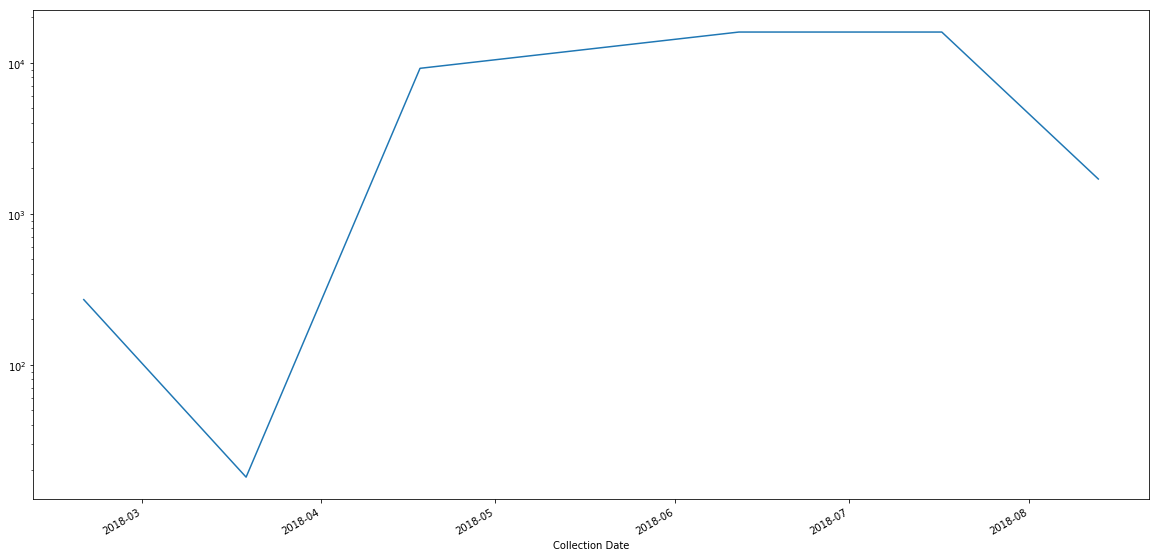

In [8]:
e_coli_ct['Ecoli/100g'].plot(figsize=(20, 10), logy="True")

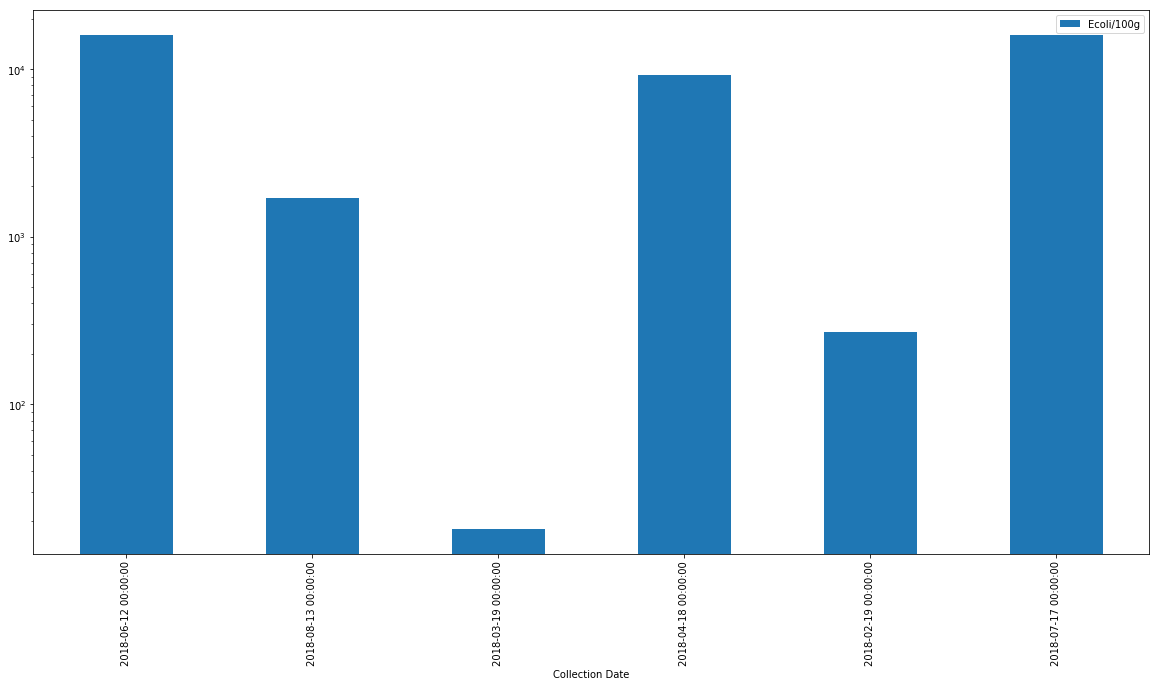

In [15]:
e_coli_ct.plot.bar(y=['Ecoli/100g'], figsize=(20, 10), logy=True)

In [10]:
e_coli_ct['Ecoli/100g']

Collection Date
2018-06-12    16000.0
2018-08-13     1700.0
2018-03-19       18.0
2018-04-18     9200.0
2018-02-19      270.0
2018-07-17    16000.0
Name: Ecoli/100g, dtype: float64

In [12]:
e_coli_ct.columns

Index(['Ecoli/100g', 'Production Area'], dtype='object')

In [16]:
e_coli_ct.iloc[0]

Ecoli/100g                 16000
Production Area    Loch na Cille
Name: 2018-06-12 00:00:00, dtype: object

# Biotoxin

[Biotoxins are substances which are both toxic and have a biological origin. ](http://www.biosciences-labs.bham.ac.uk/exhibit/whatare.html)

In [18]:
def read_biotoxin_():
    biotoxin_list = []
    for f in filenames_shellfish_biotoxin:
        biotoxin_list.append(pd.read_excel(os.path.join(data_dir_path, f)))
    return pd.concat(biotoxin_list, sort=True)

def read_biotoxin():
    biotoxin = read_biotoxin_()
    biotoxin['Date Collected'] = pd.to_datetime(biotoxin['Date Collected']) 
    biotoxin = biotoxin.set_index('Date Collected')
    #biotoxin = biotoxin.fillna(0)
    return biotoxin

biotoxin = read_biotoxin()

def biotoxin_select_area(biotoxin, area):

    biotoxin_ct = biotoxin[biotoxin['Production Area'] == area]
    biotoxin_ct = biotoxin_ct.sort_index()
    
    return biotoxin_ct
    
biotoxin_ct = biotoxin_select_area(biotoxin, 'Loch na Cille')

In [19]:
biotoxin_ct['Species']

Date Collected
2017-12-04    Common mussels
2018-01-04    Common mussels
2018-01-04    Common mussels
2018-01-04    Common mussels
2018-02-05    Common mussels
2018-02-05    Common mussels
2018-02-05    Common mussels
2018-03-06    Common mussels
2018-03-06    Common mussels
2018-03-06    Common mussels
2018-03-06    Common mussels
2018-03-26    Common mussels
2018-03-26    Common mussels
2018-03-26    Common mussels
2018-03-26    Common mussels
2018-04-03    Common mussels
2018-04-03    Common mussels
2018-04-03    Common mussels
2018-04-03    Common mussels
2018-04-18    Common mussels
2018-04-18    Common mussels
2018-04-18    Common mussels
2018-04-23    Common mussels
2018-04-23    Common mussels
2018-04-23    Common mussels
2018-05-09    Common mussels
2018-05-09    Common mussels
2018-05-09    Common mussels
2018-05-09    Common mussels
2018-05-16    Common mussels
                   ...      
2018-06-20    Common mussels
2018-06-20    Common mussels
2018-06-20    Common mussels

In [14]:
biotoxin_ct['PSP_HPLC (µg STXeq/kg) Semiquant result_<400-≥400']

Date Collected
2018-06-27    <400
2018-07-02     NaN
2018-07-11    <400
2018-07-11    <400
2018-07-17     NaN
2018-07-17     NaN
2018-07-22     NaN
2018-07-30    <400
Name: PSP_HPLC (µg STXeq/kg) Semiquant result_<400-≥400, dtype: object

In [15]:
biotoxin_ct['PSP_HPLC (µg STXeq/kg) Quant_highvalue_result']

Date Collected
2018-06-27    <RL
2018-07-02    NaN
2018-07-11    <RL
2018-07-11    <RL
2018-07-17    NaN
2018-07-17    NaN
2018-07-22    NaN
2018-07-30    <RL
Name: PSP_HPLC (µg STXeq/kg) Quant_highvalue_result, dtype: object

In [16]:
biotoxin_ct.iloc[:, 8]

Date Collected
2018-06-27    Common mussels
2018-07-02    Common mussels
2018-07-11    Common mussels
2018-07-11    Common mussels
2018-07-17    Common mussels
2018-07-17    Common mussels
2018-07-22    Common mussels
2018-07-30    Common mussels
Name: Species, dtype: object

In [17]:
biotoxin_ct.iloc[:, 9]

Date Collected
2018-06-27    Detected
2018-07-02          ND
2018-07-11    Detected
2018-07-11    Detected
2018-07-17         NaN
2018-07-17         NaN
2018-07-22         NaN
2018-07-30    Detected
Name: PSPScreenbyHPLC_ND-DETECTED, dtype: object

In [18]:
biotoxin_ct.iloc[:, 10]

Date Collected
2018-06-27    <400
2018-07-02     NaN
2018-07-11    <400
2018-07-11    <400
2018-07-17     NaN
2018-07-17     NaN
2018-07-22     NaN
2018-07-30    <400
Name: PSP_HPLC (µg STXeq/kg) Semiquant result_<400-≥400, dtype: object

In [19]:
biotoxin_ct.iloc[:, 12]

Date Collected
2018-06-27    <RL
2018-07-02    NaN
2018-07-11    <RL
2018-07-11    <RL
2018-07-17    NaN
2018-07-17    NaN
2018-07-22    NaN
2018-07-30    <RL
Name: PSP_HPLC (µg STXeq/kg) Quant_highvalue_result, dtype: object

In [20]:
biotoxin_ct.iloc[:, 14]

Date Collected
2018-06-27   NaN
2018-07-02   NaN
2018-07-11   NaN
2018-07-11   NaN
2018-07-17   NaN
2018-07-17   NaN
2018-07-22   NaN
2018-07-30   NaN
Name: PSP_by_MBA_(µg STXeq/kg), dtype: float64

In [53]:
biotoxin_ct.iloc[:, 16]

Date Collected
2017-12-04     NaN
2018-01-04     NaN
2018-01-04     NaN
2018-01-04     NaN
2018-02-05     NaN
2018-02-05     NaN
2018-02-05     NaN
2018-03-06     NaN
2018-03-06     NaN
2018-03-06     NaN
2018-03-06     NaN
2018-03-26     NaN
2018-03-26     NaN
2018-03-26     NaN
2018-03-26     NaN
2018-04-03    <400
2018-04-03    <400
2018-04-03    <400
2018-04-03    <400
2018-04-18     NaN
2018-04-18     NaN
2018-04-18     NaN
2018-04-23     NaN
2018-04-23     NaN
2018-04-23     NaN
2018-05-09    <400
2018-05-09    <400
2018-05-09    <400
2018-05-09    <400
2018-05-16    <400
              ... 
2018-06-20    <400
2018-06-20    <400
2018-06-20    <400
2018-06-20    <400
2018-06-27    <400
2018-06-27    <400
2018-06-27    <400
2018-06-27    <400
2018-07-02     NaN
2018-07-02     NaN
2018-07-02     NaN
2018-07-02     NaN
2018-07-11    <400
2018-07-11    <400
2018-07-11    <400
2018-07-11    <400
2018-07-17     NaN
2018-07-17     NaN
2018-07-17     NaN
2018-07-17     NaN
2018-07-22     N

In [20]:
pd.DataFrame(biotoxin_ct.iloc[:, 16]).plot.bar(figsize=(20, 10), grid=True)

TypeError: Empty 'DataFrame': no numeric data to plot

In [23]:
biotoxin_ct.iloc[:, 17]

Date Collected
2018-06-27    <RL
2018-07-02    <RL
2018-07-11    <RL
2018-07-11    <RL
2018-07-17    <RL
2018-07-17    <RL
2018-07-22    <RL
2018-07-30    <RL
Name: Total AZAs (µg AZA1 eq/kg) - HIGH value result, dtype: object

In [24]:
biotoxin_ct.iloc[:, 18]

Date Collected
2018-06-27    <RL
2018-07-02    <RL
2018-07-11    0.1
2018-07-11    0.1
2018-07-17      1
2018-07-17      1
2018-07-22    0.2
2018-07-30    0.3
Name: Total YTXs (mg YTX eq/kg) - HIGH value result, dtype: object

In [25]:
biotoxin_ct.iloc[:, 20]

Date Collected
2018-06-27   NaN
2018-07-02   NaN
2018-07-11   NaN
2018-07-11   NaN
2018-07-17   NaN
2018-07-17   NaN
2018-07-22   NaN
2018-07-30   NaN
Name: DSP BY MBA_NG-PS, dtype: float64

In [26]:
biotoxin_ct.iloc[:, 22]

Date Collected
2018-06-27     NaN
2018-07-02    <LOQ
2018-07-11     NaN
2018-07-11     NaN
2018-07-17     NaN
2018-07-17     NaN
2018-07-22     NaN
2018-07-30    <LOQ
Name: ASP\n(mg /kg) , dtype: object

# Map

http://geo.holoviews.org/Working_with_Bokeh.html

https://scipython.com/book/chapter-2-the-core-python-language-i/additional-problems/converting-between-an-os-grid-reference-and-longitudelatitude/

https://stackoverflow.com/questions/39117276/python-to-convert-map-reference-to-latitude-longitude

http://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/

In [7]:
# http://geo.holoviews.org/Working_with_Bokeh.html

import xarray as xr
import numpy as np
import pandas as pd
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf

import cartopy
from cartopy import crs as ccrs

from bokeh.tile_providers import STAMEN_TONER
from bokeh.models import WMTSTileSource

hv.notebook_extension('bokeh')

AttributeError: module 'numpy' has no attribute '__version__'